In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df = pd.read_csv('Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [77]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [79]:
df.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [80]:
print(df, df.shape)

     Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0         522         7.93   Windy           Low   Afternoon      Scooter   
1         738        16.42   Clear        Medium     Evening         Bike   
2         741         9.52   Foggy           Low       Night      Scooter   
3         661         7.44   Rainy        Medium   Afternoon      Scooter   
4         412        19.03   Clear           Low     Morning         Bike   
..        ...          ...     ...           ...         ...          ...   
995       107         8.50   Clear          High     Evening          Car   
996       271        16.28   Rainy           Low     Morning      Scooter   
997       861        15.62   Snowy          High     Evening      Scooter   
998       436        14.17   Clear           Low   Afternoon         Bike   
999       103         6.63   Foggy           Low       Night      Scooter   

     Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0   

In [81]:
df = df[["Distance_km", "Weather", "Traffic_Level", "Time_of_Day", "Vehicle_Type", "Preparation_Time_min", "Courier_Experience_yrs", "Delivery_Time_min"]].dropna()
print(df, df.shape)

     Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0           7.93   Windy           Low   Afternoon      Scooter   
1          16.42   Clear        Medium     Evening         Bike   
2           9.52   Foggy           Low       Night      Scooter   
3           7.44   Rainy        Medium   Afternoon      Scooter   
4          19.03   Clear           Low     Morning         Bike   
..           ...     ...           ...         ...          ...   
995         8.50   Clear          High     Evening          Car   
996        16.28   Rainy           Low     Morning      Scooter   
997        15.62   Snowy          High     Evening      Scooter   
998        14.17   Clear           Low   Afternoon         Bike   
999         6.63   Foggy           Low       Night      Scooter   

     Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                      12                     1.0                 43  
1                      20                     2.0    

In [82]:
df.shape

(883, 8)

In [83]:
df.isna().sum()

Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

In [84]:
categorical_cols = ['Weather', 'Traffic_Level','Time_of_Day','Vehicle_Type']

In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = {}

In [86]:
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    encoded_labels[col] = label_encoder

In [87]:
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,4,1,0,2,12,1.0,43
1,16.42,0,2,1,0,20,2.0,84
2,9.52,1,1,3,2,28,1.0,59
3,7.44,2,2,0,2,5,1.0,37
4,19.03,0,1,2,0,16,5.0,68


In [88]:
df.columns

Index(['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [89]:
df.describe()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,10.051586,1.218573,1.197055,1.199320,0.783692,17.019253,4.639864,56.425821
std,5.688582,1.383747,0.754211,0.956491,0.871367,7.260201,2.922172,21.568482
min,0.590000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,8.000000
25%,5.130000,0.000000,1.000000,0.000000,0.000000,11.000000,2.000000,41.000000
50%,10.280000,1.000000,1.000000,1.000000,0.000000,17.000000,5.000000,55.000000
75%,15.025000,2.000000,2.000000,2.000000,2.000000,23.000000,7.000000,71.000000
max,19.990000,4.000000,2.000000,3.000000,2.000000,29.000000,9.000000,141.000000


array([[<Axes: title={'center': 'Distance_km'}>,
        <Axes: title={'center': 'Weather'}>,
        <Axes: title={'center': 'Traffic_Level'}>],
       [<Axes: title={'center': 'Time_of_Day'}>,
        <Axes: title={'center': 'Vehicle_Type'}>,
        <Axes: title={'center': 'Preparation_Time_min'}>],
       [<Axes: title={'center': 'Courier_Experience_yrs'}>,
        <Axes: title={'center': 'Delivery_Time_min'}>, <Axes: >]],
      dtype=object)

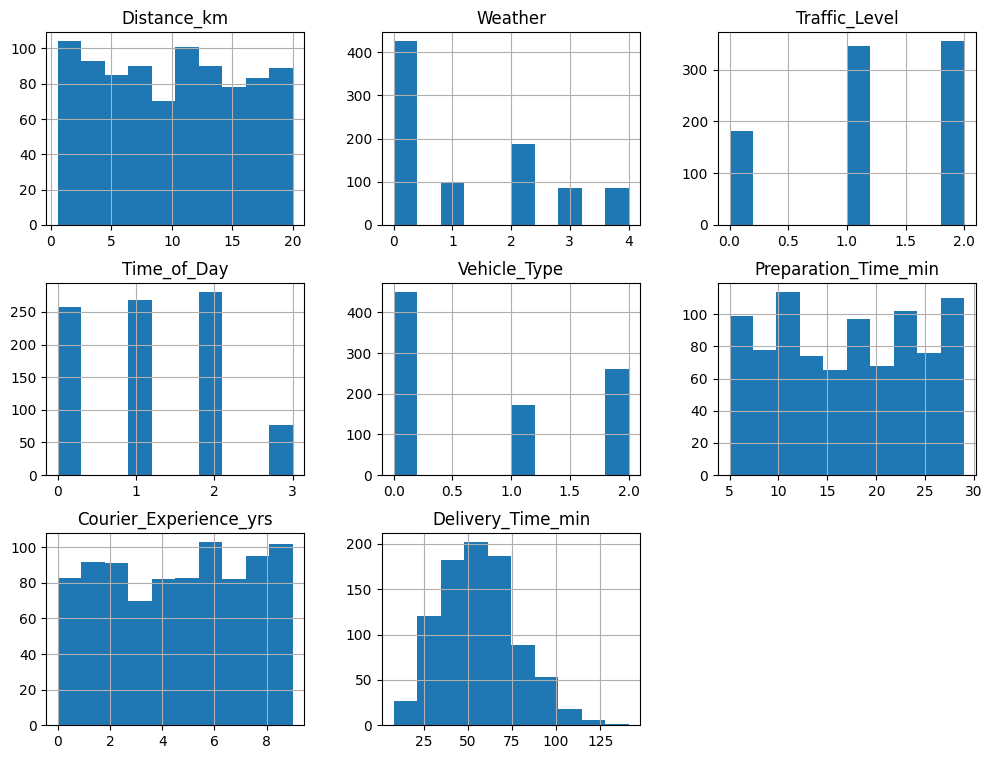

In [90]:
df.hist(figsize=(12,9))

<Axes: >

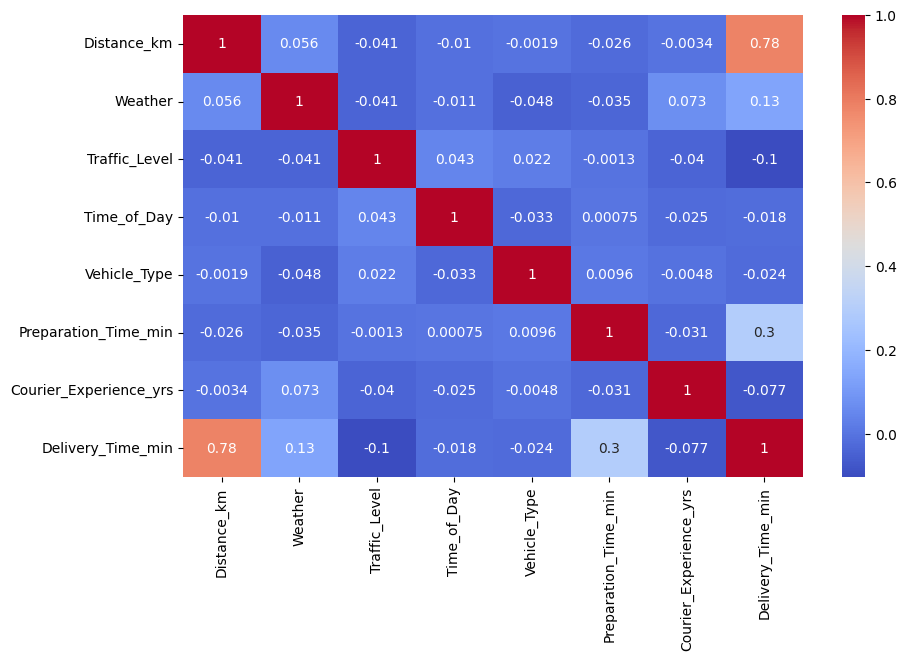

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [92]:
X = df.drop("Delivery_Time_min", axis=1)
y = df['Delivery_Time_min']

In [93]:
print(X.shape, y.shape)

(883, 7) (883,)


In [94]:
X.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
0,7.93,4,1,0,2,12,1.0
1,16.42,0,2,1,0,20,2.0
2,9.52,1,1,3,2,28,1.0
3,7.44,2,2,0,2,5,1.0
4,19.03,0,1,2,0,16,5.0


In [95]:
y.head()

0    43
1    84
2    59
3    37
4    68
Name: Delivery_Time_min, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(706, 7) (706,)
(177, 7) (177,)


In [98]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [99]:
model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(X_test)

In [101]:
y_pred

array([42.02420941, 34.13667985, 42.46475447, 85.24361983, 50.48546168,
       88.40230717, 73.37812668, 47.20914564, 65.05968436, 59.33230211,
       79.06611717, 49.40635642, 22.1299057 , 89.93603148, 67.24025644,
       59.09030531, 41.43239211, 87.71111294, 44.89989848, 36.11425762,
       70.0870211 , 68.32247561, 74.22172462, 58.83723189, 42.27237889,
       76.92412258, 44.01062269, 42.62846347, 29.17409702, 61.81863264,
       93.00689565, 62.04092247, 36.47254148, 52.24703155, 48.70445235,
       17.03675565, 58.00378197, 43.72073183, 62.20964123, 33.16851732,
       34.84949072, 39.10966605, 90.63176859, 53.89842632, 58.61956766,
       31.55748528, 73.78272091, 49.86588858, 17.73298698, 72.62563944,
       34.11990105, 86.96797038, 55.3274885 , 79.38596457, 58.20490904,
       47.4245189 , 42.50089281, 45.9180584 , 64.09678608, 59.91560134,
       40.2422917 , 78.15473372, 39.41321732, 42.02501107, 49.5784699 ,
       57.03168515, 42.43701436, 47.97210033, 78.77213507, 67.85

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("R^2: ", r2)

MAE:  6.9571419707333035
MSE:  92.12916786377355
R^2:  0.7745910867442177


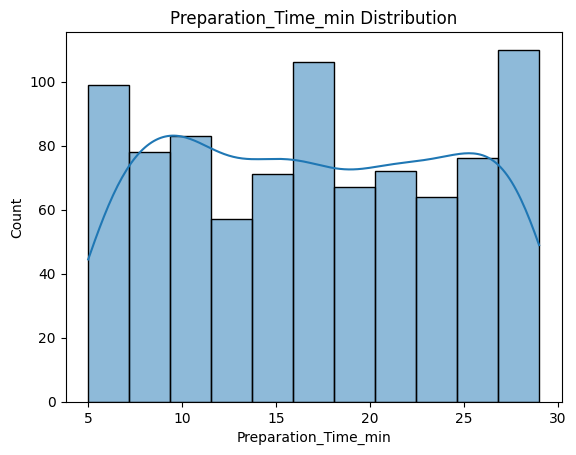

In [103]:
sns.histplot(df['Preparation_Time_min'],kde=True)
plt.title('Preparation_Time_min Distribution')
plt.show()

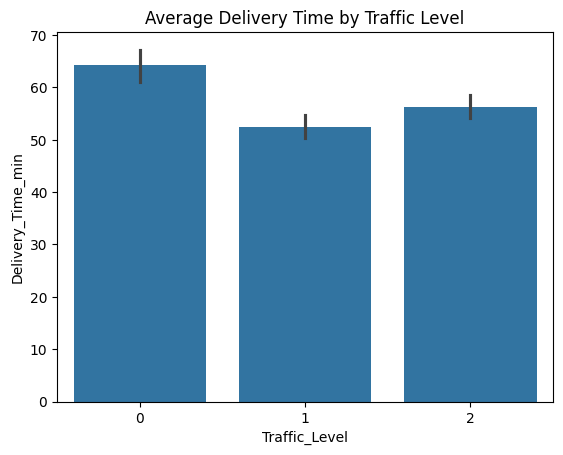

In [104]:
sns.barplot(x='Traffic_Level', y='Delivery_Time_min', data=df)
plt.title("Average Delivery Time by Traffic Level")
plt.show()

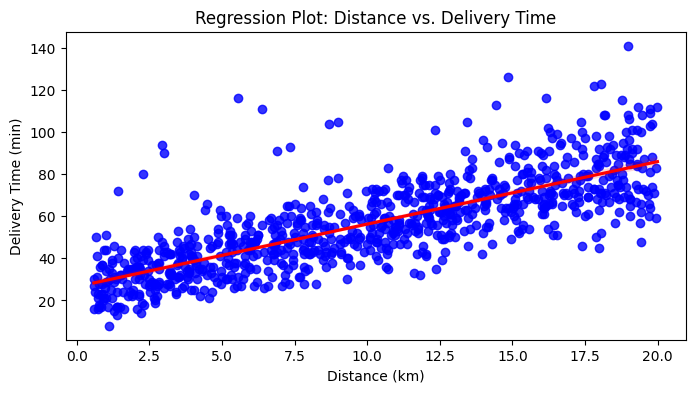

In [106]:
plt.figure(figsize=(8, 4))
sns.regplot(x=df['Distance_km'], y=df['Delivery_Time_min'], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.title("Regression Plot: Distance vs. Delivery Time")
plt.show()